In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [54]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [55]:
df=pd.read_csv('suv_data.csv')

In [56]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [57]:
df=df.drop(columns=['User ID'] ,axis=1)


In [58]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [59]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [60]:
df.groupby('Purchased').size()

Purchased
0    257
1    143
dtype: int64

In [61]:
df.groupby('Age').size().head()

Age
18    5
19    7
20    7
21    4
22    5
dtype: int64

In [62]:
df.shape

(400, 4)

# Visulization of cleaned Data

<AxesSubplot:xlabel='Purchased', ylabel='count'>

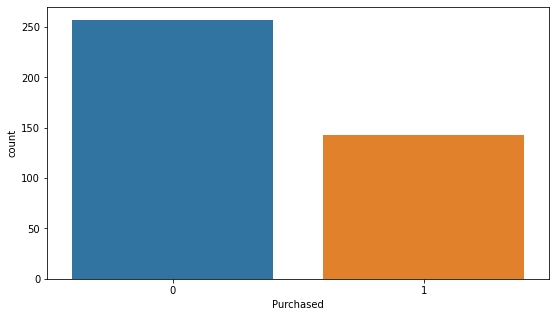

In [63]:
plt.figure(figsize = (9,5))
sns.countplot(x = 'Purchased' , data =df)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

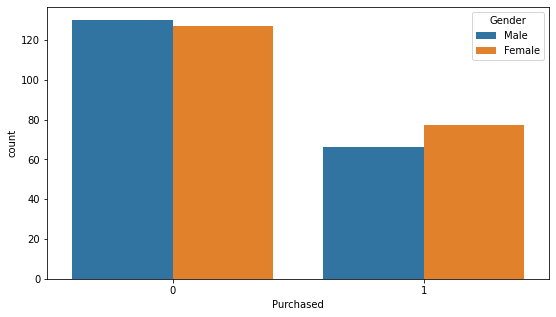

In [64]:
plt.figure(figsize=(9,5))
sns.countplot(x='Purchased',hue='Gender',data =df)

<AxesSubplot:>

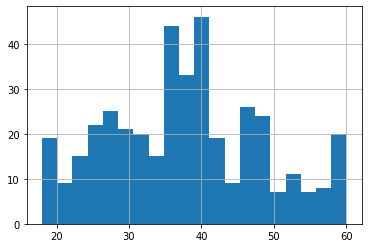

In [65]:
df['Age'].hist(bins = 20)

In [66]:
age_category = []
for i in range(0,len(df['Age'])):
    if df['Age'][i] <= 20:
        age_category.append('A-0-20');
    elif 20 < df['Age'][i] <= 26:
        age_category.append('B-21-25');
    elif 25 < df['Age'][i] <=30:
        age_category.append('C-26-30');
    elif 30 < df['Age'][i] <= 40:
        age_category.append('D-31-40');
    elif 40 < df['Age'][i] <= 50:
        age_category.append('E-41-50');
    else:
        age_category.append('F-Above50')

age_category = pd.DataFrame(data = age_category , columns = ['AgeCategory'])
df_age_category= pd.concat([df,age_category],axis =1)
df_age_category

,Gender,Age,EstimatedSalary,Purchased,AgeCategory
0,Male,19,19000,0,A-0-20
1,Male,35,20000,0,D-31-40
2,Female,26,43000,0,B-21-25
3,Female,27,57000,0,C-26-30
4,Male,19,76000,0,A-0-20
...,...,...,...,...,...
395,Female,46,41000,1,E-41-50
396,Male,51,23000,1,F-Above50
397,Female,50,20000,1,E-41-50
398,Male,36,33000,0,D-31-40


<AxesSubplot:xlabel='Purchased', ylabel='count'>

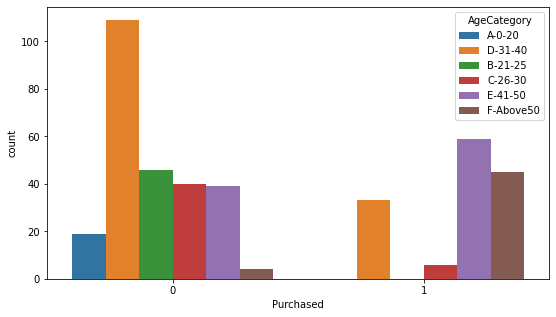

In [67]:
plt.figure(figsize=(9,5))
sns.countplot(x='Purchased',hue='AgeCategory',data =df_age_category)

In [68]:
df = df_age_category
df

,Gender,Age,EstimatedSalary,Purchased,AgeCategory
0,Male,19,19000,0,A-0-20
1,Male,35,20000,0,D-31-40
2,Female,26,43000,0,B-21-25
3,Female,27,57000,0,C-26-30
4,Male,19,76000,0,A-0-20
...,...,...,...,...,...
395,Female,46,41000,1,E-41-50
396,Male,51,23000,1,F-Above50
397,Female,50,20000,1,E-41-50
398,Male,36,33000,0,D-31-40


<AxesSubplot:>

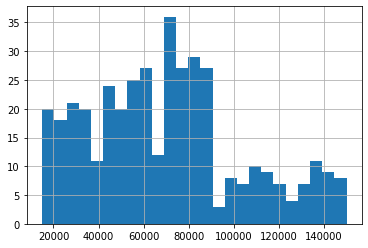

In [69]:
df['EstimatedSalary'].hist(bins = 25)

In [70]:
income_category = []
for i in range(0,len(df['EstimatedSalary'])):
    if df['EstimatedSalary'][i] <=19500:
        income_category.append('Very Low');
    elif 19500 < df['EstimatedSalary'][i] <=40000:
        income_category.append('Low');
    elif 40000 < df['EstimatedSalary'][i] <=60000:
        income_category.append('Moderately Low');
    elif 60000 < df['EstimatedSalary'][i] <=80000:
        income_category.append('Medium');
    elif 80000 < df ['EstimatedSalary'][i] <= 100000:
        income_category.append ('Moderately high');
    elif 100000 < df ['EstimatedSalary'][i] <= 130000:
        income_category.append ('High');
    elif 130000 < df ['EstimatedSalary'][i] <= 145000:
        income_category.append ('Very High');
    else:
        income_category.append ('Extremely High');
income_category = pd.DataFrame(data = income_category , columns = ['IncomeCategory'])
df_income_category = pd.concat([df,income_category],axis = 1)
df = df_income_category
df

,Gender,Age,EstimatedSalary,Purchased,AgeCategory,IncomeCategory
0,Male,19,19000,0,A-0-20,Very Low
1,Male,35,20000,0,D-31-40,Low
2,Female,26,43000,0,B-21-25,Moderately Low
3,Female,27,57000,0,C-26-30,Moderately Low
4,Male,19,76000,0,A-0-20,Medium
...,...,...,...,...,...,...
395,Female,46,41000,1,E-41-50,Moderately Low
396,Male,51,23000,1,F-Above50,Low
397,Female,50,20000,1,E-41-50,Low
398,Male,36,33000,0,D-31-40,Low


<AxesSubplot:xlabel='Purchased', ylabel='count'>

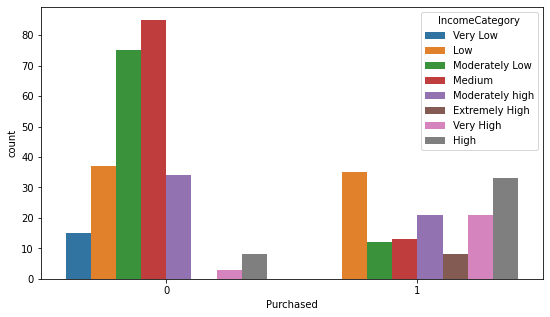

In [71]:
plt.figure(figsize =(9,5))
sns.countplot(x = 'Purchased',hue='IncomeCategory',data = df)

In [72]:
gender_number = pd.get_dummies(df['Gender'],drop_first =True)
gender_number.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [73]:
age_number = pd.get_dummies(df['AgeCategory'] ,drop_first =True)
age_number.head()

,B-21-25,C-26-30,D-31-40,E-41-50,F-Above50
0,0,0,0,0,0
1,0,0,1,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,0,0,0


In [74]:
income_number = pd.get_dummies(df['IncomeCategory'] , drop_first = True)
income_number.head()


,High,Low,Medium,Moderately Low,Moderately high,Very High,Very Low
0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0


In [75]:
df_number = pd.concat([df,age_number,gender_number,income_number] , axis = 1)
df = df_number.drop(columns = ['Age','EstimatedSalary','AgeCategory','IncomeCategory','Gender'] , axis = 1)


In [76]:
df_number

,Gender,Age,EstimatedSalary,Purchased,AgeCategory,IncomeCategory,B-21-25,C-26-30,D-31-40,E-41-50,F-Above50,Male,High,Low,Medium,Moderately Low,Moderately high,Very High,Very Low
0,Male,19,19000,0,A-0-20,Very Low,0,0,0,0,0,1,0,0,0,0,0,0,1
1,Male,35,20000,0,D-31-40,Low,0,0,1,0,0,1,0,1,0,0,0,0,0
2,Female,26,43000,0,B-21-25,Moderately Low,1,0,0,0,0,0,0,0,0,1,0,0,0
3,Female,27,57000,0,C-26-30,Moderately Low,0,1,0,0,0,0,0,0,0,1,0,0,0
4,Male,19,76000,0,A-0-20,Medium,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Female,46,41000,1,E-41-50,Moderately Low,0,0,0,1,0,0,0,0,0,1,0,0,0
396,Male,51,23000,1,F-Above50,Low,0,0,0,0,1,1,0,1,0,0,0,0,0
397,Female,50,20000,1,E-41-50,Low,0,0,0,1,0,0,0,1,0,0,0,0,0
398,Male,36,33000,0,D-31-40,Low,0,0,1,0,0,1,0,1,0,0,0,0,0


In [92]:
df_number.to_csv('test_logis.csv')

In [103]:
a = pd.read_csv('test.csv')

In [104]:
a

,B-21-25,C-26-30,D-31-40,E-41-50,F-Above50,Male,High,Low,Medium,Moderately Low,Moderately high,Very High,Very Low
0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,1,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0
5,0,1,0,0,0,1,0,0,0,1,0,0,0
6,0,1,0,0,0,0,0,0,0,0,1,0,0
7,0,0,1,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,1,0,1,0,0,0,0,0
9,0,0,1,0,0,0,0,0,1,0,0,0,0


In [80]:
df

,Purchased,B-21-25,C-26-30,D-31-40,E-41-50,F-Above50,Male,High,Low,Medium,Moderately Low,Moderately high,Very High,Very Low
0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,0,0,0,1,0,0,0,0,0,1,0,0,0
396,1,0,0,0,0,1,1,0,1,0,0,0,0,0
397,1,0,0,0,1,0,0,0,1,0,0,0,0,0
398,0,0,0,1,0,0,1,0,1,0,0,0,0,0


# Model The Data

In [81]:
Y = df['Purchased']
X = df.drop(columns=['Purchased'],axis = 1)

In [42]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [43]:
X.head()

,B-21-25,C-26-30,D-31-40,E-41-50,F-Above50,Male,High,Low,Medium,Moderately Low,Moderately high,Very High,Very Low
0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,1,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0


In [44]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X,Y, test_size = 0.3, random_state = 0)
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train,Y_train)

LogisticRegression(solver='liblinear')

In [138]:
predict = model.predict(X_train)

In [139]:
aa = pd.DataFrame(predict , columns = ['Purchased'])

In [140]:
aa

,Purchased
0,0
1,1
2,1
3,1
4,0
...,...
275,1
276,0
277,0
278,0


In [143]:
report = classification_report(Y_train,predict)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       178
           1       0.88      0.81      0.85       102

    accuracy                           0.89       280
   macro avg       0.89      0.88      0.88       280
weighted avg       0.89      0.89      0.89       280



In [145]:
accuracy_score (Y_train, predict)


0.8928571428571429